In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sntwitter
#import nltk

In [21]:
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize

In [22]:
#from nltk.stem import WordNetLemmatizer
#from nltk.stem.porter import PorterStemmer

In [25]:
#import string 
#import re
#import textblob
#from textblob import TextBlob

In [28]:
#from wordcloud import WordCloud, STOPWORDS
#from emot.emo_unicode import UNICODE_EMOJI

In [29]:
#lemmatizer = WordNetLemmatizer()

In [37]:
#from wordcloud import ImageColorGenerator
#from PIL import Image

In [38]:
#import warnings
#%matplotlib inline

In [2]:
import datetime
from tqdm.notebook import tqdm_notebook
sns.set_theme(style="whitegrid")

In [271]:
text = input('Enter query text to be matched (or leave it blank by pressing enter): ')
username = input('Enter specific username(s) from a twitter account without @ (or leave it blank by pressing enter): ')
since = input('Enter startdate in this format yyyy-mm-dd (or leave it blank by pressing enter): ')
until = input('Enter enddate in this format yyyy-mm-dd (or leave it blank by pressing enter): ')
count = int(input('Enter max number of tweets or enter -1 to retrieve all possible tweets: '))
retweet = input('Exclude Retweets? (y/n): ')
replies = input('Exclude Replies? (y/n): ')

Enter query text to be matched (or leave it blank by pressing enter): corona
Enter specific username(s) from a twitter account without @ (or leave it blank by pressing enter): 
Enter startdate in this format yyyy-mm-dd (or leave it blank by pressing enter): 
Enter enddate in this format yyyy-mm-dd (or leave it blank by pressing enter): 
Enter max number of tweets or enter -1 to retrieve all possible tweets: 10000
Exclude Retweets? (y/n): y
Exclude Replies? (y/n): y


In [272]:
def search(text,username,since,until,retweet,replies):
    global filename
    q = text
    if username!='':
        q += f" from:{username}"
    if until=='':
        until = datetime.datetime.strftime(datetime.date.today(), '%Y-%m-%d')
        q += f" until:{until}"
    if since=='':
        since = datetime.datetime.strftime(datetime.datetime.strptime(until, '%Y-%m-%d') - datetime.timedelta(days=365), '%Y-%m-%d')
        q += f" since:{since}"
    if retweet == 'y':
        q += f" exclude:retweets"
    if replies == 'y':
        q += f" exclude:replies"
    if username!='' and text!='':
        filename = f"{since}_{until}_{username}_{text}.csv"
    elif username!="":
        filename = f"{since}_{until}_{username}.csv"
    else:
        filename = f"{since}_{until}_{text}.csv"
        print(filename)
    return q

In [273]:
q = search(text,username,since,until,retweet,replies)
# Creating list to append tweet data
tweets_list1 = []
# Using TwitterSearchScraper to scrape data and append tweets to list
if count == -1:
    for i,tweet in enumerate(tqdm_notebook(sntwitter.TwitterSearchScraper(q).get_items())):
        tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username,tweet.lang,tweet.hashtags,tweet.replyCount,tweet.retweetCount, tweet.likeCount,tweet.quoteCount,tweet.media])
else:
    with tqdm_notebook(total=count) as pbar:
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(q).get_items()): #declare a username
            if i>=count: #number of tweets you want to scrape
                break
            tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username,tweet.lang,tweet.hashtags,tweet.replyCount,tweet.retweetCount,tweet.likeCount,tweet.quoteCount,tweet.media])
            pbar.update(1)
# Creating a dataframe from the tweets list above
df = pd.DataFrame(tweets_list1, columns=['DateTime', 'TweetId', 'Text', 'Username','Language','Hashtags','ReplyCount','RetweetCount','LikeCount','QuoteCount','Media']) 

2022-04-09_2023-04-09_corona.csv


  0%|          | 0/10000 [00:00<?, ?it/s]

In [275]:
df.sort_values(by='DateTime',ascending=False)

,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media
0,2023-04-08 23:59:38+00:00,1644852532928208897,Que dolor me causa leer esta noticia.\n\nChant...,AnselCorona,es,None,5,1,13,0,None
1,2023-04-08 23:59:35+00:00,1644852520437555207,"Con potencias y corona, sin potencias ni coron...",ErasmoPocos,es,None,0,0,0,0,None
2,2023-04-08 23:59:19+00:00,1644852451713994757,Qué corona tiene este vividor del poder para n...,Yquechuros,es,None,0,0,0,0,None
3,2023-04-08 23:58:55+00:00,1644852354490200065,今1番熱い番組仮面ライダーギーツ,wooo_corona,ja,None,0,0,0,0,None
4,2023-04-08 23:58:43+00:00,1644852302736490496,"Cálmate ya, no me arruinas\nTienes celos, que ...",mycrownbot,es,None,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...
9995,2023-04-06 23:46:40+00:00,1644124492892102656,こんなんスプレーしてても終わるが,Corona_33535,ja,None,0,0,0,0,None
9996,2023-04-06 23:46:31+00:00,1644124456539811840,"O rapazinho mete a mão no bolso, mas rapidamen...",NeoPragmatico,pt,None,0,0,0,0,None
9997,2023-04-06 23:46:00+00:00,1644124328206774272,The characteristics of your mobile on a web. Y...,SoyLuisCorona_,en,"[Google, html, css, javascript, api, webhost, ...",1,0,1,0,[Photo(previewUrl='https://pbs.twimg.com/media...
9998,2023-04-06 23:45:44+00:00,1644124257599860738,estoy vendiendo 2 boletos de el corona capital...,sofzkiwii,es,None,0,0,0,0,None


In [276]:
'''import traceback

try:
    df.to_csv(f'{filename}', index=False)
    print("File saved successfully!")
except Exception as e:
    print(f"Error saving file: {e}")
    print(traceback.format_exc())'''


'import traceback\n\ntry:\n    df.to_csv(f\'{filename}\', index=False)\n    print("File saved successfully!")\nexcept Exception as e:\n    print(f"Error saving file: {e}")\n    print(traceback.format_exc())'

In [277]:
df.tail()

,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media
9995,2023-04-06 23:46:40+00:00,1644124492892102656,こんなんスプレーしてても終わるが,Corona_33535,ja,None,0,0,0,0,None
9996,2023-04-06 23:46:31+00:00,1644124456539811840,"O rapazinho mete a mão no bolso, mas rapidamen...",NeoPragmatico,pt,None,0,0,0,0,None
9997,2023-04-06 23:46:00+00:00,1644124328206774272,The characteristics of your mobile on a web. Y...,SoyLuisCorona_,en,"[Google, html, css, javascript, api, webhost, ...",1,0,1,0,[Photo(previewUrl='https://pbs.twimg.com/media...
9998,2023-04-06 23:45:44+00:00,1644124257599860738,estoy vendiendo 2 boletos de el corona capital...,sofzkiwii,es,None,0,0,0,0,None
9999,2023-04-06 23:45:39+00:00,1644124240558399489,El tiempo una vez más me demostró que una deci...,AnselCorona,es,None,1,1,12,1,None


In [288]:
df.shape

(10000, 11)

In [294]:
df2 = pd.DataFrame(df['Text'])

In [295]:
df2.rename(columns={'Text': 'Tweet'}, inplace=True)

In [296]:
df2.shape

(10000, 1)

In [297]:
df2.head()

,Tweet
0,Que dolor me causa leer esta noticia.\n\nChant...
1,"Con potencias y corona, sin potencias ni coron..."
2,Qué corona tiene este vividor del poder para n...
3,今1番熱い番組仮面ライダーギーツ
4,"Cálmate ya, no me arruinas\nTienes celos, que ..."


In [298]:
df2.shape

(10000, 1)

In [299]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


In [300]:
df2.drop_duplicates(subset = 'Tweet', inplace = True)

In [301]:
df2.shape

(9862, 1)

In [302]:
df2.dtypes

Tweet    object
dtype: object

In [303]:
df3 = df2['Tweet']

# Cleaning

In [304]:
from langdetect import detect

english_sentences = []
non_english_sentences = []

for sentence in df3:
    try:
        if detect(sentence) == 'en':
            english_sentences.append(sentence)
        else:
            non_english_sentences.append(sentence)
    except:
        non_english_sentences.append(sentence)

In [305]:
df4 = pd.DataFrame(english_sentences)

In [306]:
df4.head()

,0
0,Best part of Eid is all these Old Northside ga...
1,Shame on you
2,I was one of the people fighting Corona. My re...
3,Great round 2 from Adrian Corona and Jerry Per...
4,Drinking a Corona Extra by @GrupoModelo_MX @ U...


In [307]:
df4.columns = ['Tweet']

In [308]:
# Import necessary libraries
import re
from textblob import TextBlob

# Function to clean the tweets
def clean_tweet(tweet):
    # Remove mentions and URLs
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    tweet = re.sub(r'https?://[A-Za-z0-9./]+', '', tweet)
    # Remove special characters and digits
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    # Remove \n and _
    tweet = re.sub(r'[\n_]', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    return tweet

# Apply the cleaning function to the "text" column
df4['clean_text'] = df4['Tweet'].apply(clean_tweet)

# Function to perform sentiment analysis
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply the sentiment analysis function to the "clean_text" column
df4['sentiment_polarity'], df4['sentiment_subjectivity'] = zip(*df4['clean_text'].apply(get_sentiment))

# Display the results
print(df4[['Tweet', 'sentiment_polarity', 'sentiment_subjectivity']])

                                                  Tweet  sentiment_polarity  \
0     Best part of Eid is all these Old Northside ga...            0.400000   
1                                          Shame on you            0.000000   
2     I was one of the people fighting Corona. My re...            0.000000   
3     Great round 2 from Adrian Corona and Jerry Per...            0.200000   
4     Drinking a Corona Extra by @GrupoModelo_MX @ U...            0.000000   
...                                                 ...                 ...   
2559  Lab coats and goggles are for pussies. You are...            0.100000   
2560  MP Corona update: Madhya Pradesh corona wail! ...            0.200000   
2561  I’ll never understand why liberals thought Joe...            0.000000   
2562  After I finish these 65 or so Bud Lights I hav...           -0.066667   
2563  The characteristics of your mobile on a web. Y...            0.500000   

      sentiment_subjectivity  
0                   

In [309]:
df4.head()

,Tweet,clean_text,sentiment_polarity,sentiment_subjectivity
0,Best part of Eid is all these Old Northside ga...,best part of eid is all these old northside ga...,0.4,0.233333
1,Shame on you,shame on you,0.0,0.000000
2,I was one of the people fighting Corona. My re...,i was one of the people fighting corona my res...,0.0,0.000000
3,Great round 2 from Adrian Corona and Jerry Per...,great round from adrian corona and jerry pere...,0.2,0.405556
4,Drinking a Corona Extra by @GrupoModelo_MX @ U...,drinking a corona extra by untappd at home,0.0,0.100000


In [310]:
# Define a function to map polarity values to sentiment labels
def get_sentiment_label(polarity):
    if polarity >= 0.15:
        return 'positive'
    else:
        return 'negative'

# Map polarity values to sentiment labels
df4['sentiment'] = df4['sentiment_polarity'].apply(get_sentiment_label)

# Display the results
print(df4.head())


                                               Tweet  \
0  Best part of Eid is all these Old Northside ga...   
1                                       Shame on you   
2  I was one of the people fighting Corona. My re...   
3  Great round 2 from Adrian Corona and Jerry Per...   
4  Drinking a Corona Extra by @GrupoModelo_MX @ U...   

                                          clean_text  sentiment_polarity  \
0  best part of eid is all these old northside ga...                 0.4   
1                                       shame on you                 0.0   
2  i was one of the people fighting corona my res...                 0.0   
3  great round  from adrian corona and jerry pere...                 0.2   
4     drinking a corona extra by   untappd at home                   0.0   

   sentiment_subjectivity sentiment  
0                0.233333  positive  
1                0.000000  negative  
2                0.000000  negative  
3                0.405556  positive  
4               

In [311]:
df4['sentiment'].value_counts()

negative    1897
positive     667
Name: sentiment, dtype: int64

In [312]:
df4.shape

(2564, 5)

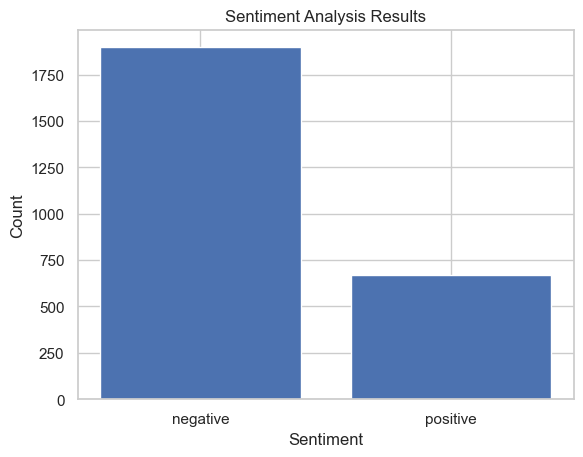

In [313]:
# Count the number of positive, negative, and neutral values in the "sentiment" column
sentiment_counts = df4['sentiment'].value_counts()

# Create a bar plot of the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Set the plot title and axis labels
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()

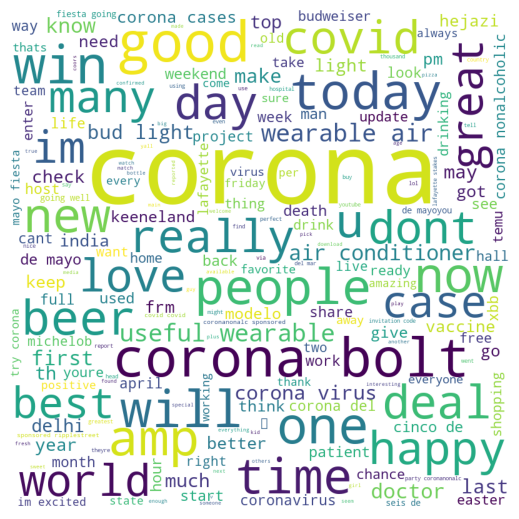

In [314]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the dataframe to include only positive sentiment tweets
positive_df = df4[df4['sentiment'] == 'positive']

# Concatenate all the tweet texts into a single string
positive_text = " ".join(positive_df['clean_text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

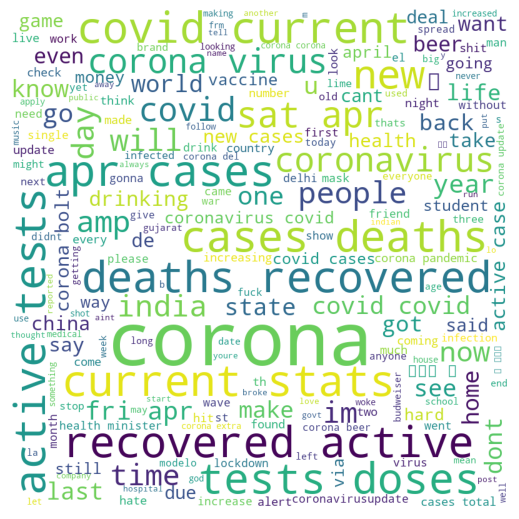

In [315]:
# Filter the dataframe to include only neutral sentiment tweets
neutral_df = df4[df4['sentiment'] == 'negative']

# Concatenate all the tweet texts into a single string
neutral_text = " ".join(neutral_df['clean_text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(neutral_text)

# Display the word cloud
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

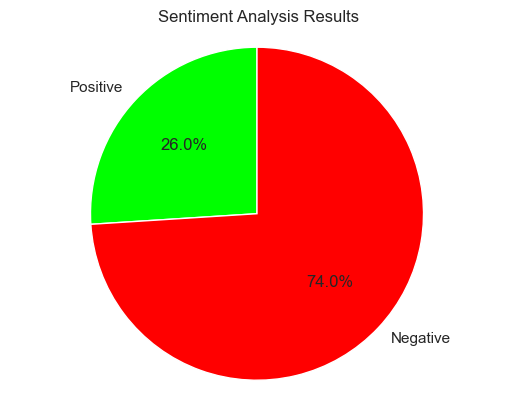

In [316]:
labels = ['Positive', 'Negative']
n_positive = df4['sentiment'].value_counts()['positive']
n_negative = df4['sentiment'].value_counts()['negative']
sizes = [n_positive, n_negative]
colors = ['#00FF00', '#FF0000']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Sentiment Analysis Results')

plt.show()